PREDICTION USING SUPERVISED ML

In the task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the number of hours studied and the target value is the percentage scored. This can be solved using simple linear regression

In [26]:
#Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


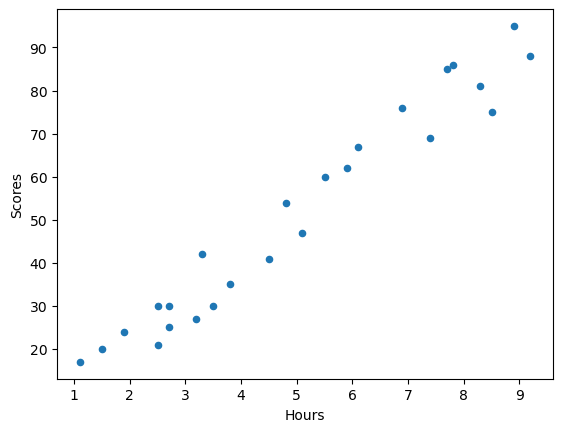

In [8]:
data.plot(kind='scatter' , x='Hours', y='Scores');
plt.show()

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
hours = data['Hours']
scores= data['Scores']

C:\Users\Cheshtha Vasudeva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

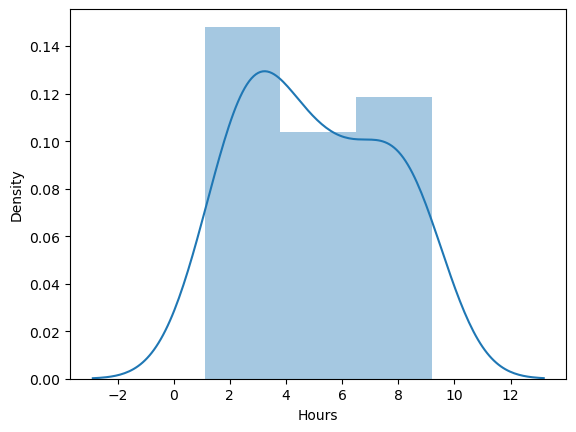

In [12]:
sns.distplot(hours)

C:\Users\Cheshtha Vasudeva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

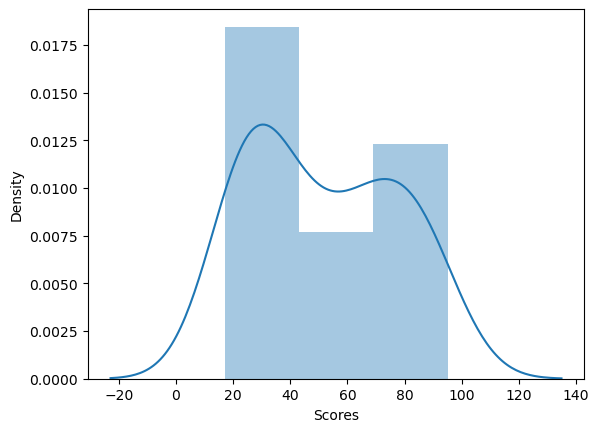

In [13]:
sns.distplot(scores)

In [16]:
X= data.iloc[:, :-1].values
y= data.iloc[: ,1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X , y, test_size= 0.2, random_state = 50)

In [18]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

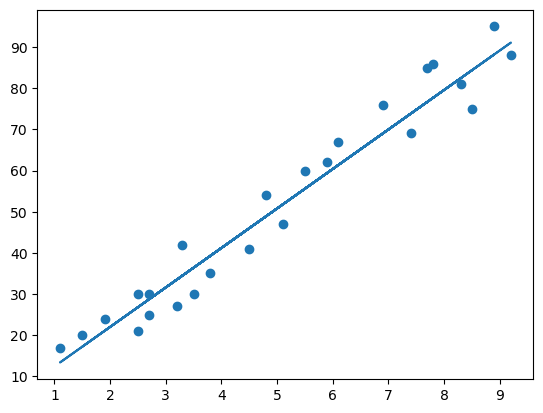

In [19]:
m= reg.coef_
c= reg.intercept_
line = m*X+c
plt.scatter(X, y)
plt.plot(X , line);
plt.show()

In [20]:
y_pred=reg.predict(X_test)

In [21]:
actual_predicted=pd.DataFrame({'Target' :y_test, 'Predicted' :y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\Cheshtha Vasudeva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


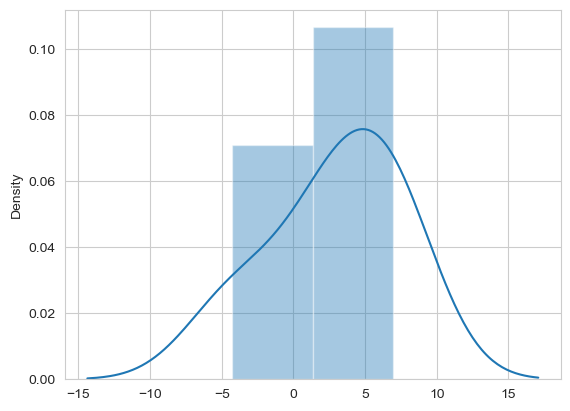

In [22]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

What would be the predicted score if a studenty studies for 9.25 hours/days?

In [23]:
h = 9.25
s = reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score{} % in exam".format(h,s))

If a student studies for 9.25 hours per day he/she will score[91.56986604] % in exam


If a student studies for 9.25 hours per day he/she will score[91.56986604] % in exam

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absoute Error:', metrics.mean_absolute_error(y_test , y_pred))
print('R2 Score:' , r2_score(y_test, y_pred))

Mean Absoute Error: 4.5916495300630285
R2 Score: 0.971014141329942
